# Практическая работа 2

## Цель работы

Провести статистический анализ выбранного датасета и применить все полученные знания на данном курсе.

## Описание датасета

В нашем распоряжении данные, взятые с kaggle.com — все данные о покупаках, клиентах и заказах какого-то супермаркета. В датасете выделены 21 стобец:
- Row ID => Уникальный номер ID для каждой строки.
- Order ID => Уникальный номер ID заказа.
- Order Date => Дата заказа каждого проукта.
- Ship Date => Дата получение товара
- Ship Mode=> Способ отправки товара (класс)
- Customer ID => Уникальный ID для каждого клиента.
- Customer Name => Имя клиента.
- Segment => Сегмент, к которому принадлежит клиент.
- Country => Страна проживания клиента.
- City => Город проживания клиента.
- State => Штат проживания клиента.
- Postal Code => Почтовый индекс клиента.
- Region => Регион проживания клиента.
- Product ID => Уникальный ID продукта.
- Category => Категория заказанного товара.
- Sub-Category => Подкатегория заказанного товара.
- Product Name => Название товара
- Sales => Стоимость товара.
- Quantity => Количество товара.
- Discount => Предоставляемая скидка.
- Profit => Прибыль или убыток.

## Изучение данных из файла

In [2]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scipy.stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import sklearn.metrics as skl
import plotly.graph_objects as go

In [3]:
# Чтение нашего датасета с корневой папки, где находится и исполняемый файл
# были проблема с раскодировкой данных, поэтому изучив информацию в интернете, все решилось добавлением encoding='windows-1252'
data = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')
# Смотрим первые 11 строк
data.head(11)

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0        1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1        2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2        3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3        4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4        5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
5        6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
6        7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
7        8  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
8        9  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
9       10  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   
10      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   

   Customer ID    Customer Name    Segment        Country             City  \
0     CG-12520      Claire Gute   Consumer  United States        Henderson   
1     CG-12520      Claire Gute   Consumer  United States        Henderson   
2     DV-13045  Darrin Van Huff  Corporate  United States      Los Angeles   
3     SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4     SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
5     BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
6     BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
7     BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
8     BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
9     BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
10    BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   

    ... Postal Code  Region       Product ID         Category Sub-Category  \
0   ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1   ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
2   ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3   ...       33311   South  FUR-TA-10000577        Furniture       Tables   
4   ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
5   ...       90032    West  FUR-FU-10001487        Furniture  Furnishings   
6   ...       90032    West  OFF-AR-10002833  Office Supplies          Art   
7   ...       90032    West  TEC-PH-10002275       Technology       Phones   
8   ...       90032    West  OFF-BI-10003910  Office Supplies      Binders   
9   ...       90032    West  OFF-AP-10002892  Office Supplies   Appliances   
10  ...       90032    West  FUR-TA-10001539        Furniture       Tables   

                                         Product Name      Sales  Quantity  \
0                   Bush Somerset Collection Bookcase   261.9600         2   
1   Hon Deluxe Fabric Upholstered Stacking Chairs,...   731.9400         3   
2   Self-Adhesive Address Labels for Typewriters b...    14.6200         2   
3       Bretford CR4500 Series Slim Rectangular Table   957.5775         5   
4                      Eldon Fold 'N Roll Cart System    22.3680         2   
5   Eldon Expressions Wood and Plastic Desk Access...    48.8600         7   
6                                          Newell 322     7.2800         4   
7                      Mitel 5320 IP Phone VoIP phone   907.1520         6   
8   DXL Angle-View Binders with Locking Rings by S...    18.5040         3   
9                    Belkin F5C206VTEL 6 Outlet Surge   114.9000         5   
10           Chromcraft Rectangular Conference Tables  1706.1840         9   

    Discount    Profit  
0       0.00   41.9136  
1       0.00  219.5820  
2       0.00    6.8714  
3       0.45 -383.0310  
4       0.20    2.5164  
5       0.00   14.1694  
6       0.00    1.9656  
7       0.20   90.7152  
8       0.20    5.7825  
9       0.00   34.4700  
10      0.20   85.3092  

[11 rows x 21 columns]

In [4]:
# смотрим размерность датасета
data.shape

(9994, 21)

После модификации, датасет отобразился корректно. У нас 9994 строк и 21 колонка, как и было первоначально заявлено + 1 колонка, дублирующая индексы. Удалим эту дублирующую колонку, а также изучим датасет чуть детальнее.

In [5]:
# Удаление лишней колонки
del data['Row ID']
#data.head(11)

Посмотрим уникальные значения по "стране клиента", есть подозрение, что там будет одна страна - штаты. Тогда можно тоже будет удалить этот столбец. Также удаляем почтовый индекс (не планируем проводить анализ по адресам клиентов) и сами имена клиентов (у нас сохранится их уникальный айди). Все это необходимо, чтобы разгрузить немного датасет. 

In [6]:
# Смотрим частотное распределение по странам проживания клиентов
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [7]:
del data['Country']
del data['Customer Name']
del data['Postal Code']

In [8]:
data.head()

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Segment             City       State Region       Product ID  \
0   Consumer        Henderson    Kentucky  South  FUR-BO-10001798   
1   Consumer        Henderson    Kentucky  South  FUR-CH-10000454   
2  Corporate      Los Angeles  California   West  OFF-LA-10000240   
3   Consumer  Fort Lauderdale     Florida  South  FUR-TA-10000577   
4   Consumer  Fort Lauderdale     Florida  South  OFF-ST-10000760   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture       Chairs   
2  Office Supplies       Labels   
3        Furniture       Tables   
4  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [9]:
# Смотрим общие характеристики по нашему датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Ship Date     9994 non-null   object 
 3   Ship Mode     9994 non-null   object 
 4   Customer ID   9994 non-null   object 
 5   Segment       9994 non-null   object 
 6   City          9994 non-null   object 
 7   State         9994 non-null   object 
 8   Region        9994 non-null   object 
 9   Product ID    9994 non-null   object 
 10  Category      9994 non-null   object 
 11  Sub-Category  9994 non-null   object 
 12  Product Name  9994 non-null   object 
 13  Sales         9994 non-null   float64
 14  Quantity      9994 non-null   int64  
 15  Discount      9994 non-null   float64
 16  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(13)
memory usage: 1.3+ MB


Пропусков нет. Все типы данных для каждой колонки определнны верно, т.е. где мы предполагаем увидеть целое число- у нас тип данных целого числа(int64), а где строковое значение - там тип object. Единственное, можно заменить тип данных на datetime в колонках ship date и order date.

In [10]:
# Преобразовываю в тип даты
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data.head()

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Segment             City       State Region       Product ID  \
0   Consumer        Henderson    Kentucky  South  FUR-BO-10001798   
1   Consumer        Henderson    Kentucky  South  FUR-CH-10000454   
2  Corporate      Los Angeles  California   West  OFF-LA-10000240   
3   Consumer  Fort Lauderdale     Florida  South  FUR-TA-10000577   
4   Consumer  Fort Lauderdale     Florida  South  OFF-ST-10000760   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture       Chairs   
2  Office Supplies       Labels   
3        Furniture       Tables   
4  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

Кроме того, создадим отдельные колонки по году, месяцу и числу и дню недели заказа, а также рассчитаем время доставки заказа.

In [11]:
data['Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Month'] = pd.DatetimeIndex(data['Order Date']).month
data['Day'] = pd.DatetimeIndex(data['Order Date']).day
data['Day of week'] = data['Order Date'].dt.day_name()
data['Time of delivery'] = (data['Ship Date'] - data['Order Date']).dt.days
#data.head(20)

### Найдем частотные по колонкам

<AxesSubplot:title={'center':'Частотная таблица по классу доставки'}>

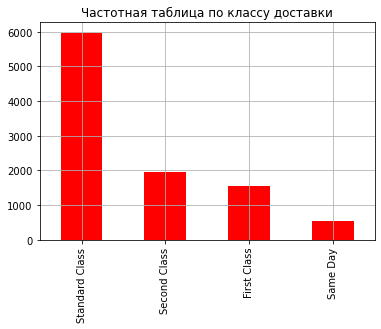

In [12]:
# Строим гистограмму по частотным значениям
data['Ship Mode'].value_counts().plot(kind='bar', grid=True, color='red', title='Частотная таблица по классу доставки')

Видим, что подавляющее большинство людей готовы немного подождать и заказывают стандартный класс, на 2м месте те, кто хочет сэкономить на доставке, 3ье - те, кто готов доплатить за качество доставки и на последнем месте те, кто не готов ждать больше дня.

<AxesSubplot:title={'center':'Частотная таблица по сегменту'}>

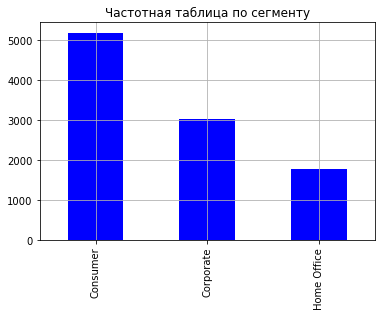

In [13]:
data['Segment'].value_counts().plot(kind='bar', grid=True, color='blue', title='Частотная таблица по сегменту')

Из этой гистограммы видим, что больше всего физических лиц, на втором месте компании и потом уже "домашний офис".

<AxesSubplot:title={'center':'Частотная таблица по городам'}>

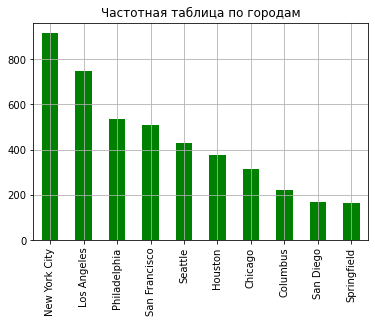

In [14]:
data['City'].value_counts().head(10).plot(kind='bar', grid=True, color='green', title='Частотная таблица по городам')

Больше всего заказов приходится на Нью-Йорк, замыкает топ-10 городов по количеству заказов город Спрингфилд.

<AxesSubplot:title={'center':'Частотная таблица по штатам'}>

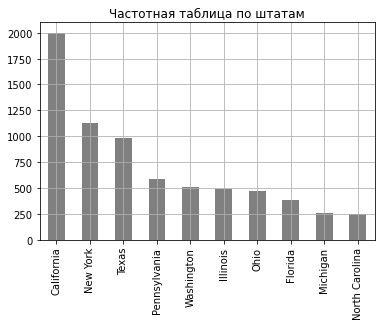

In [15]:
data['State'].value_counts().head(10).plot(kind='bar', grid=True, color='grey', title='Частотная таблица по штатам')

Количество заказов в разрезе штатов показывает нам другую ситуацию. Штат Калифорния на первом месте, когда как штат Нью-Йорк уже на втором. Также замыкает десятку Северная Каролина.

<AxesSubplot:title={'center':'Частотная таблица по категориям товара'}>

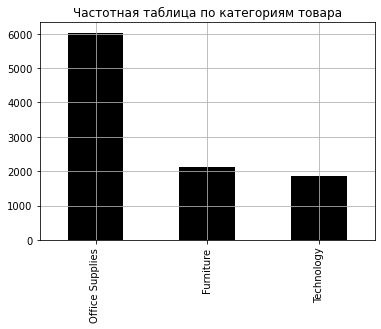

In [16]:
data['Category'].value_counts().plot(kind='bar', grid=True, color='black', title='Частотная таблица по категориям товара')

Здесь мы видим, что больше всего заказывают офисные принадлежности в этом супермаркете и второе-третье место это фурнитура и техника, соотвественно.

<AxesSubplot:title={'center':'Частотная таблица по подкатегориям товара'}>

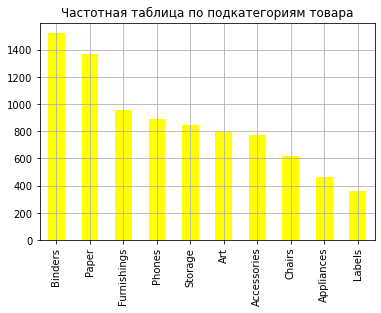

In [17]:
data['Sub-Category'].value_counts().head(10).plot(kind='bar', grid=True, color='yellow', title='Частотная таблица по подкатегориям товара')

Здесь на первом месте папки/скоросшиватели/обложки, на втором месте - бумага.

<AxesSubplot:title={'center':'Частотная таблица по году заказа'}>

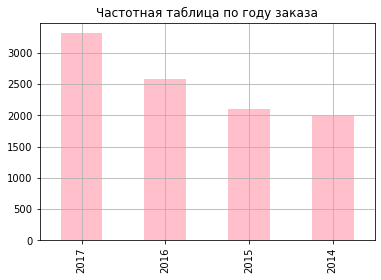

In [18]:
data['Year'].value_counts().head(10).plot(kind='bar', grid=True, color='pink', title='Частотная таблица по году заказа')

Здесь можем наблюдать отличную тенденцию увеличения количества заказов с каждым годом. 2017 год (последний из базы данных) самый пиковый.

<AxesSubplot:title={'center':'Частотная таблица по месяцу заказа'}>

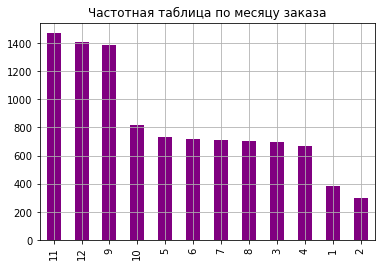

In [19]:
data['Month'].value_counts().plot(kind='bar', grid=True, color='purple', title='Частотная таблица по месяцу заказа')

Здесь можем наблюдать, в целом, тоже ожидаемую картину, самые пиковые месяца - ноябрь, декабрь и сентябрь, когда начинается новый учебный и рабочий сезон.

<AxesSubplot:title={'center':'Частотная таблица по дню заказа'}>

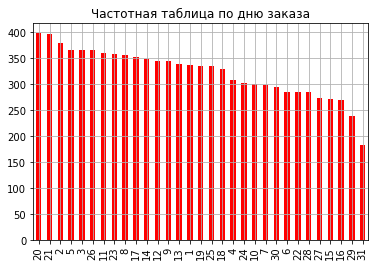

In [20]:
data['Day'].value_counts().plot(kind='bar', grid=True, color='red', title='Частотная таблица по дню заказа')

Здесь трудно определить какую-то явную закономерность, в какие числа чаще всего что-то заказывали. Но можно отметить, что в 20 и 21 числа заказывали чаще всего, когда как в 31 число каждого месяца - меньше. Но тут надо учитывать, что не во всех месяцах есть 31ое число.

<AxesSubplot:title={'center':'Частотная таблица по дню недели заказа'}>

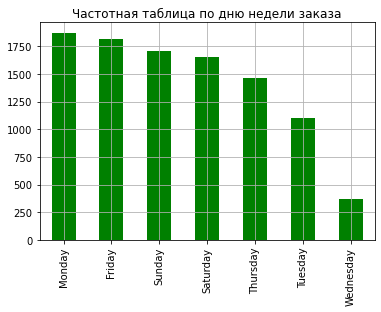

In [21]:
data['Day of week'].value_counts().plot(kind='bar', grid=True, color='green', title='Частотная таблица по дню недели заказа')

Здесь видим, что на начало рабочей недели приходится больше всего заказов обычно, далее - конец рабочей недели. 3 и 4 место делят между собой выходные дни. И катастрофически мало заказов приходится на среду.

<AxesSubplot:title={'center':'Частотная таблица по количеству дней доставки'}>

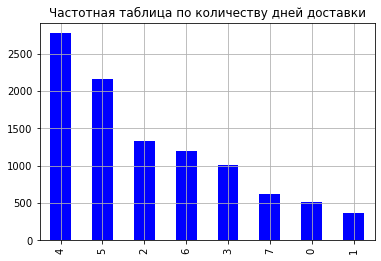

In [22]:
data['Time of delivery'].value_counts().plot(kind='bar', grid=True, color='blue', title='Частотная таблица по количеству дней доставки')

Чаще всего доставку осуществляют за 4 дня, реже всего за 1 день.

## Рассмотрим меры центральной тенденции

In [23]:
data.describe()

Sales     Quantity     Discount       Profit         Year  \
count   9994.000000  9994.000000  9994.000000  9994.000000  9994.000000   
mean     229.858001     3.789574     0.156203    28.656896  2015.722233   
std      623.245101     2.225110     0.206452   234.260108     1.123555   
min        0.444000     1.000000     0.000000 -6599.978000  2014.000000   
25%       17.280000     2.000000     0.000000     1.728750  2015.000000   
50%       54.490000     3.000000     0.200000     8.666500  2016.000000   
75%      209.940000     5.000000     0.200000    29.364000  2017.000000   
max    22638.480000    14.000000     0.800000  8399.976000  2017.000000   

             Month          Day  Time of delivery  
count  9994.000000  9994.000000       9994.000000  
mean      7.809686    15.468481          3.958175  
std       3.284654     8.748327          1.747567  
min       1.000000     1.000000          0.000000  
25%       5.000000     8.000000          3.000000  
50%       9.000000    15.000000          4.000000  
75%      11.000000    23.000000          5.000000  
max      12.000000    31.000000          7.000000

По полученным результатам можно сказать, что:
- Средняя сумма покупок - примерно 230 долларов
- Среднее количество покупок - почти 4
- Средняя скидка на товары - почти 16%
- Средняя прибыль - почти 29%
- Средняя продолжительность доставки - почти 4 дня

Теперь посмотрим на диаграмму размаха, чтобы узнать все ли значения у нас входят в доверительный интервал или все же есть некоторые выбросы. Сделаем это с помощью функции boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa018257940>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa018257fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa018257670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa018362460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa018362730>],
 'means': []}

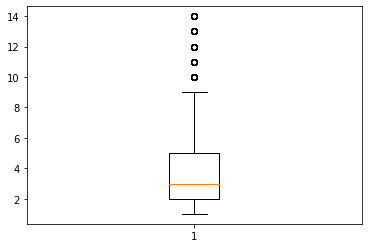

In [24]:
plt.boxplot(x=data['Quantity'])

In [25]:
data[data['Sales'] > 210]['Sales'].count()

2492

Почти четвертая часть всех покупок выходят за доверительный интервал. То есть практически каждая четвертая покупка по величине в разы превосходит большинство (остальные три). Такое количество значений мы не можем исключать и категорировать, как "выбросы". Поэтому принимаем их во внимание.

Изучим, как менялась сумма покупок за имеющиеся года.

<AxesSubplot:xlabel='Year'>

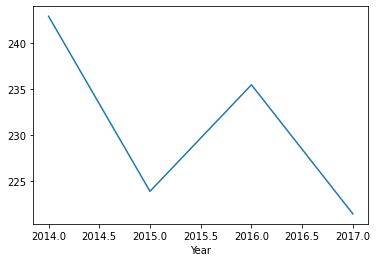

In [26]:
data.groupby('Year')['Sales'].mean().plot()

Интересные наблюдения: в 2014 году медианная сумма покупок была наибольшей, возможно это был год, когда все начали покупать в интернете какие-то более габаритные вещи, соотвественно, - более дорогие. В 17-м году тренд на e-com значительно вырос, и все начали покупать в ИМ всё, даже карандаши. Их низкие цены по сравнению, например, со стулом в разы меньше и, соотвественно, медиана могла упасть. Но это всего лишь гипотеза, одна из множества, чтобы ее подтвердить или опровергунть нужны дополнительные данные.

Посмотрим, какие штаты США за все 3 года на какую сумму купили товаров с помощью продвинутой визуализации.

In [27]:
# Скопируем готовый словарь для перевода наших названий штатов из таблицы в стандартный сокращенный
code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
        'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC',
        'Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL',
        'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
        'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
        'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH',
        'New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND',
        'Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
        'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT',
        'Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
# создаём новый столбец с кодом штата
data['Code'] = data['State'].map(code)

# создаём новую таблицу с кодом штата и суммой закупа каждого штата
data2 = data.pivot_table(index='Code', values=['Sales'], aggfunc=['sum']).reset_index()
# убираем мультииндексы в названиях столбцов новой таблицы
data2.columns = data2.columns.map(''.join)
# применяем наш график к таблице, где locations - это наши штаты с кодом, locationmode - выбираем карту, разграниченную по штатам
# color - какие данные мы хотим отобразить градиентно по цвету, scope - какую страну рассматрвиаем
# color_continuous_scale - цвет градиента
fig = go.Figure()
fig = px.choropleth(data2, locations='Code',
                    locationmode="USA-states", color='sumSales', scope="usa", color_continuous_scale = 'Reds')
fig.show()


По карте видим, что штат Калифорния супер много чего-то покупает в рассматриваемом супермаркете. На втором месте идет штат Нью-Йорк, третье место - Техас. Так можно предположить, что наш супермаркет находится преимущественно в Калифорнии, раз оттуда больше всего заказов и, соотвественно, сумма выкупа самая наибольшая.

### Что чаще покупают

Посмотрим, какой продукт был самым продаваемым в супермаркете за все года.

In [28]:
data['Product Name'].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

За все 3 года обнаружились топ-3 самых покупаемых товаров - самосклеивающиеся конверты, скобы для степлера и сам степлер. Посмотрим, менялось ли лидерство топовых товаров по годам?

In [29]:
data[data['Year'] == 2017]['Product Name'].value_counts()

Easy-staple paper                                             16
Staples                                                       15
Staples in misc. colors                                       12
Staple envelope                                               11
Storex Dura Pro Binders                                        8
                                                              ..
Economy #2 Pencils                                             1
GBC Clear Cover, 8-1/2 x 11, unpunched, 25 covers per pack     1
Xerox 1995                                                     1
Ultra Door Push Plate                                          1
Hon 4070 Series Pagoda Round Back Stacking Chairs              1
Name: Product Name, Length: 1511, dtype: int64

Проверили топы по всем 4м годам, везде была одна и та же тройка лидеров, только в 17 году на 3ье место вылезли еще скобы для степлера разных цветов. Поэтому, выборку сделаем только по 4м позициям.

<AxesSubplot:xlabel='Year'>

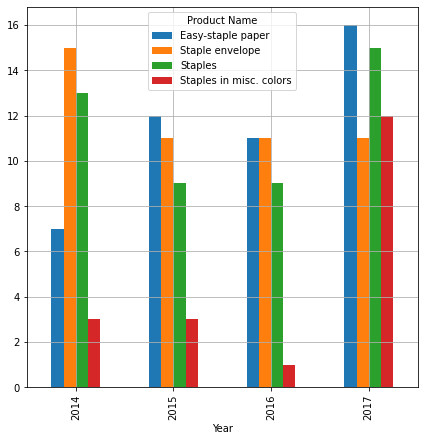

In [30]:
data[(data['Product Name'] == 'Staple envelope') |
     (data['Product Name'] == 'Staples') |
     (data['Product Name'] == 'Easy-staple paper') |
     (data['Product Name'] == 'Staples in misc. colors')].groupby('Year')['Product Name'].value_counts().unstack().plot(kind='bar', grid=True, figsize=(7,7))

Видим, что цветные скобы набрали популярность резко только в 2017 году. При этом, самосклеивающиеся конверты тоже каждый год набирали свою популярность. Также можно предположить, что средняя жизнь степлера 3 года. Это произошло по причине того, что его пиковые значения по закупам были в 2014 и 2017 годах.

**Посмотрим на то, как возможно коррелируют у нас числовые данные**

array([[<AxesSubplot:xlabel='Sales', ylabel='Sales'>,
        <AxesSubplot:xlabel='Discount', ylabel='Sales'>,
        <AxesSubplot:xlabel='Profit', ylabel='Sales'>,
        <AxesSubplot:xlabel='Year', ylabel='Sales'>,
        <AxesSubplot:xlabel='Day', ylabel='Sales'>],
       [<AxesSubplot:xlabel='Sales', ylabel='Discount'>,
        <AxesSubplot:xlabel='Discount', ylabel='Discount'>,
        <AxesSubplot:xlabel='Profit', ylabel='Discount'>,
        <AxesSubplot:xlabel='Year', ylabel='Discount'>,
        <AxesSubplot:xlabel='Day', ylabel='Discount'>],
       [<AxesSubplot:xlabel='Sales', ylabel='Profit'>,
        <AxesSubplot:xlabel='Discount', ylabel='Profit'>,
        <AxesSubplot:xlabel='Profit', ylabel='Profit'>,
        <AxesSubplot:xlabel='Year', ylabel='Profit'>,
        <AxesSubplot:xlabel='Day', ylabel='Profit'>],
       [<AxesSubplot:xlabel='Sales', ylabel='Year'>,
        <AxesSubplot:xlabel='Discount', ylabel='Year'>,
        <AxesSubplot:xlabel='Profit', ylabel='Year'>,
 

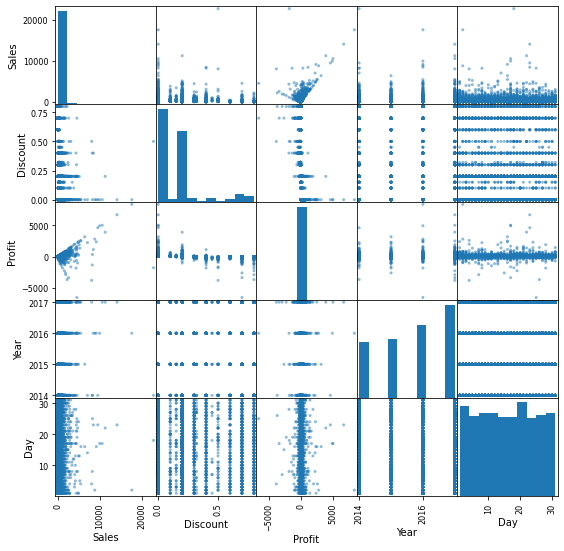

In [31]:
data_kol = data[['Sales', 'Discount', 'Profit', 'Year', 'Day']]
pd.plotting.scatter_matrix(data_kol, figsize=(9, 9)) 


In [32]:
data.corr()

Sales  Quantity  Discount    Profit      Year     Month  \
Sales             1.000000  0.200795 -0.028190  0.479064 -0.009679 -0.000625   
Quantity          0.200795  1.000000  0.008623  0.066253 -0.005810  0.023355   
Discount         -0.028190  0.008623  1.000000 -0.219487 -0.002662 -0.004935   
Profit            0.479064  0.066253 -0.219487  1.000000  0.004670 -0.000502   
Year             -0.009679 -0.005810 -0.002662  0.004670  1.000000 -0.020183   
Month            -0.000625  0.023355 -0.004935 -0.000502 -0.020183  1.000000   
Day               0.003150  0.011614 -0.004016 -0.002965 -0.017455 -0.033581   
Time of delivery -0.007354  0.018298  0.000408 -0.004649 -0.022736  0.000810   

                       Day  Time of delivery  
Sales             0.003150         -0.007354  
Quantity          0.011614          0.018298  
Discount         -0.004016          0.000408  
Profit           -0.002965         -0.004649  
Year             -0.017455         -0.022736  
Month            -0.033581          0.000810  
Day               1.000000          0.015603  
Time of delivery  0.015603          1.000000

Нигде какой-то явной корреляции не просматривается.

## Непараметрические критерии. Критерий независимости хи2

#### Н0: Нет зависимости между сегментом покупателя и количеством приобретаемого товара.

Условно раскатегорируем клиентов по количеству купленных товаров: 
- 0:это до 3 покупок,
- 1: это от 4 до 7 покупок,
- 2: это от 8 до 10 покупок,
- 3: это больше 10 покупок

In [33]:
def howmuch(a):
    if 0 <= a <= 3:
        return '0'
    elif 4 <= a <= 7:
        return '1'
    elif 8 <= a <= 10:
        return '2'
    else:
        return '3'
    
data['Quantity_Cat'] = data['Quantity'].apply(howmuch)

In [34]:
# Посмотрим, какие есть сегменты клиентов и какие есть категории товаров
display(data['Segment'].value_counts())
display(data['Quantity_Cat'].value_counts())

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

0    5710
1    3599
2     572
3     113
Name: Quantity_Cat, dtype: int64

In [35]:
# Создадим общую таблицу
data_seg_quacat = data.groupby('Segment')['Quantity_Cat'].value_counts().unstack()
data_seg_quacat

Quantity_Cat     0     1    2   3
Segment                          
Consumer      3006  1846  278  61
Corporate     1706  1097  185  32
Home Office    998   656  109  20

Ищем значение хи2. Используем специальную библиотеку и функцию для расчет хи2.

In [36]:
scipy.stats.chi2_contingency(data_seg_quacat, correction = False)

(4.642544309816246,
 0.5904057555991089,
 6,
 array([[2965.8405043 , 1869.36251751,  297.10346208,   58.69351611],
        [1725.45527316, 1087.55053032,  172.84770863,   34.14648789],
        [1018.70422253,  642.08695217,  102.0488293 ,   20.159996  ]]))

По результатам видим, что значение хи2 = 4.64, 6 степеней свободы. Теперь рассчитаем область критических значений с помощью специальной функции. Возьмем за уровень статистичской значимости 5%.

In [37]:
# Сохраняем в отдельную переменную найденное значение хи2
chi_seg_quacat = scipy.stats.chi2_contingency(data_seg_quacat, correction = False)[0]

In [38]:
alpha = 0.05

In [39]:
# Рассчитываем область критических значений
critical_value = scipy.stats.chi2.ppf(0.95, 4)
critical_value

9.487729036781154

In [40]:
# теперь сопоставляем полученное значение хи2 и область критических значений
'Нулевая гипотеза не отвергнута' if critical_value > chi_seg_quacat else 'Нулевая гипотеза отвергнута'

'Нулевая гипотеза не отвергнута'

**Гипотеза не отвергнута**, значит все-таки связь между сегментом покупателя и количеством покупок есть.

#### Проверка нормальности распределения

Построим гистограммы распределения количества заказов по всем 3 сегментам покупателей.

<AxesSubplot:>

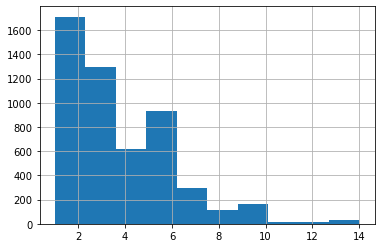

In [41]:
consumer =  data[data['Segment'] == 'Consumer']['Quantity']
corporate = data[data['Segment'] == 'Corporate']['Quantity']
home_office = data[data['Segment'] == 'Home Office']['Quantity']
consumer.hist()

<AxesSubplot:>

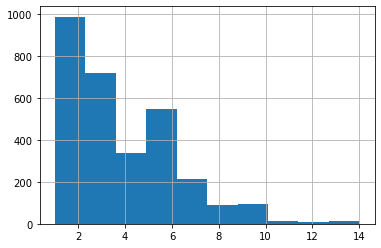

In [42]:
corporate.hist()

<AxesSubplot:>

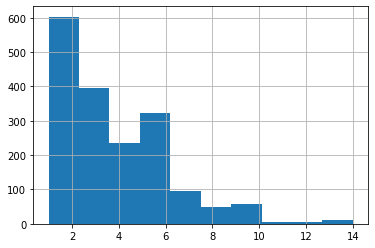

In [43]:
home_office.hist()

У каждого сегмента, в целом, распределение плавное, как будто похоже на распределение Пуасона, но и при этом везде есть небольшой пик на отметке 5-6 товаров.

Построим графики нормальности распределения.

<Figure size 432x288 with 0 Axes>

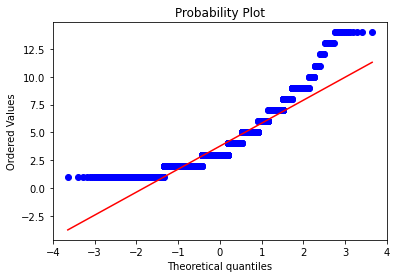

<Figure size 432x288 with 0 Axes>

In [44]:
scipy.stats.probplot(consumer, plot = plt)
plt.figure()

<Figure size 432x288 with 0 Axes>

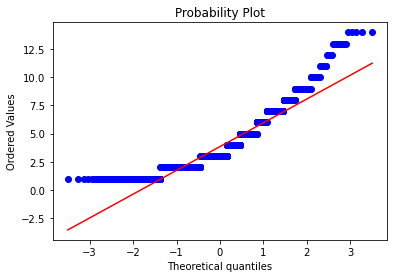

<Figure size 432x288 with 0 Axes>

In [45]:
scipy.stats.probplot(corporate, plot = plt)
plt.figure()

<Figure size 432x288 with 0 Axes>

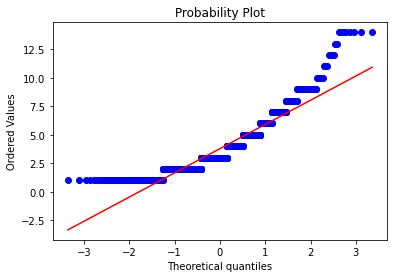

<Figure size 432x288 with 0 Axes>

In [46]:
scipy.stats.probplot(home_office, plot = plt)
plt.figure()

И проведем тест Шапиро-Уилк.

In [47]:
stat, p = scipy.stats.shapiro(data['Quantity'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Statistics=0.882, p-value=0.000
Отклонить гипотезу о нормальности


/Users/julianan/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



Гипотеза о том, что наше распределение по товаром нормальное - отвергнута.

## Параметрические критерии. t-тест

**H0 гипотеза:** средняя стоимость покупок на востоке США и на западе - одинаковая

**H1 гипотеза:** Существует статистически значимая разница в средней стоимости покупок, которые осуществляются на востоке и западе страны.

- Двусторонний тест
- Альфа = 0.05

In [48]:
east_client = data[data['Region'] == 'East']['Sales']
west_client = data[data['Region'] == 'West']['Sales']

Строим гистограммы распределения

<AxesSubplot:>

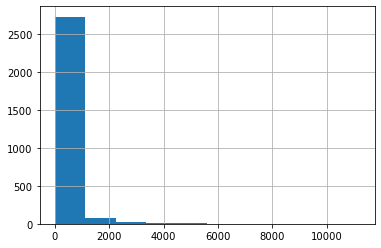

In [49]:
east_client.hist()

<AxesSubplot:>

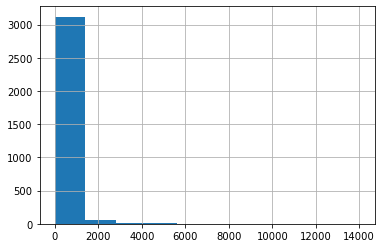

In [50]:
west_client.hist()

По полученным гистограммам трудно судить о нормальности, переведем их в логарифмический вид.

In [51]:
east_client_log = np.log(east_client)
west_client_log = np.log(west_client)

<AxesSubplot:>

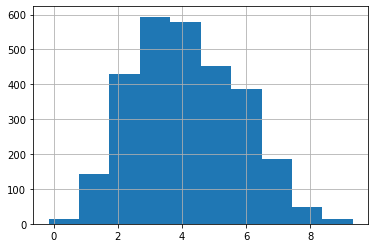

In [52]:
east_client_log.hist()

<AxesSubplot:>

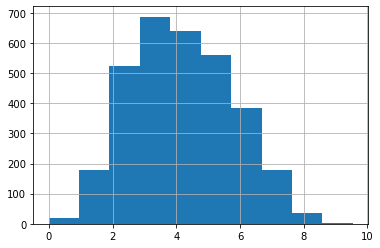

In [53]:
west_client_log.hist()

<Figure size 432x288 with 0 Axes>

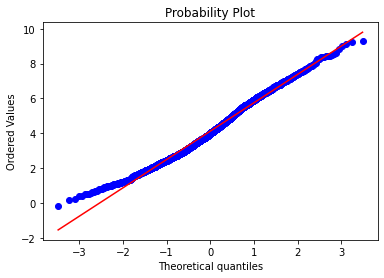

<Figure size 432x288 with 0 Axes>

In [54]:
scipy.stats.probplot(east_client_log, plot = plt)
plt.figure()

<Figure size 432x288 with 0 Axes>

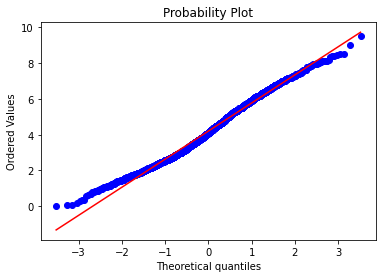

<Figure size 432x288 with 0 Axes>

In [55]:
scipy.stats.probplot(west_client_log, plot = plt)
plt.figure()

Данные распределены нормально. Теперь проверим дисперсию у наших выборок.

In [56]:
print(east_client.var())
print(west_client.var())

385284.1966147407
275495.73625875503


Тест по отличию дисперсий - пройден. Рассчитаем количество степеней свободы с поправкой Уэлча.

In [57]:
n1 = len(east_client)
n2 = len(west_client)
var1 = east_client.var()
var2 = west_client.var()
#print(n1, n2, var1, var2)

In [58]:
v1 = var1 / n1
v2 = var2 / n2
dof_welch = int((v1 + v2) ** 2 / (v1 ** 2 / (n1 - 1) + v2 ** 2 / (n2 -1)))
dof_welch

5603

Получили 5603 степеней свободы по расчетам с поправкой Уэлча. Возьмем t-критерий равный 1.9667

Запишем функцию, для определения отвергаем мы нулевую гипотезу с выбором альтернативной или не отвергаем.

In [59]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) > t_critical:
        print('Отвергаем Н0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')
        
t_critical = 1.9667

Рассчитаем стандартную ошибку

In [60]:
s_m1m2 = np.sqrt(v1 + v2)
print(s_m1m2)

14.87595892514269


Теперь рассчитаем сам t-критерий. Так как мы тестируем гипотезу, что средние значения будут одинаоквые, то в итоговой формуле в числителе у нас будет только одно значение - разность средних значений по каждой выборке.

In [61]:
# Найдем среднее выборок
mean1 = east_client.mean()
mean2 = west_client.mean()

In [62]:
# Рассчитываем t-критерий
t = (mean1 - mean2) / s_m1m2
print(t)

0.7961084633003513


In [63]:
hypothesis_check(t, t_critical)

Не удалось отвергнуть H0


По итогам теста отвергнуть гипотезу, что средняя стоимость покупок на востоке США и на западе одинаковая - мы не можем

## Линейная регрессия

Посмотрим на зависимость выгоды от средней стоимости товара. Создадим новый датафрейм из числовых данных понедельно за 2017ый год (потому что там больше всего было заказов). Итого должно получиться 52 строки.

In [64]:
data_2017 = data[data['Year'] == 2017]

profit_sum = data_2017.groupby(data_2017['Order Date'].dt.isocalendar().week)['Profit'].sum()
sales_mean = data_2017.groupby(data_2017['Order Date'].dt.isocalendar().week)['Sales'].mean()

profit_per_week = pd.concat([profit_sum, sales_mean], axis=1)
# profit_per_week

**Проверим**, есть ли смысл строить модель для наших данных. Для этого построим "хитмап", чтобы наглядно увидеть, насколько коррелируют значения дохода и средней ценой товара между собой.

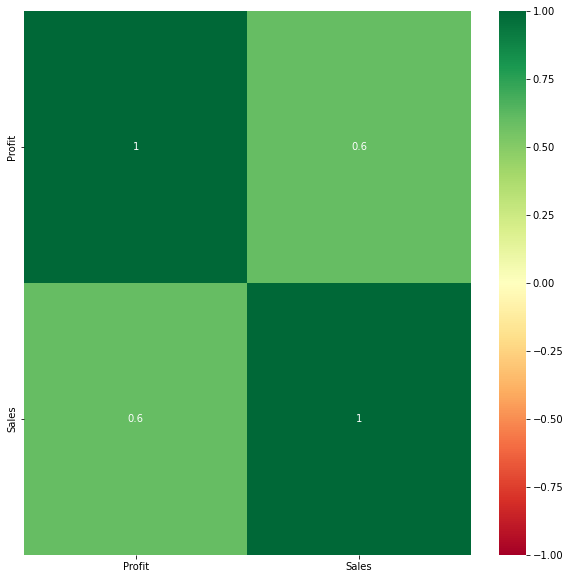

In [65]:
plt.figure(figsize = (10,10))
d = sns.heatmap(profit_per_week.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'RdYlGn')

Теперь проверим, есть ли линейная зависимость у наших данных. Построим парные графики зависимости.

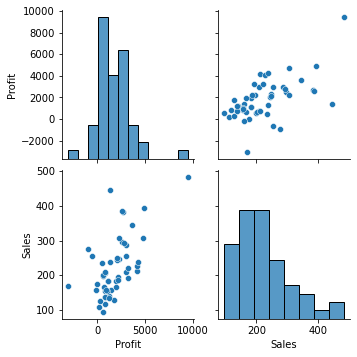

In [66]:
sns.pairplot(profit_per_week)

Да, можно рассмотреть линейную зависимость между данными, значит пробуем строить линейную регрессию. Сначала соберем все необходимые переменные. Обозачим переменные X_low и y_low, то есть y_low = a * X_low + b. Будем использовать готовую функцию из библиотеки statsmodels, чтобы автоматически построить регрессионную модель.

In [67]:
# Определяем значения переменных
X_low = sm.add_constant(profit_per_week.drop('Profit', axis=1))
y_low = profit_per_week['Profit']

# Строим модель
model_low = sm.OLS(y_low, X_low)
res_mult_low = model_low.fit()
res_mult_low.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     28.04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           2.66e-06
Time:                        21:09:19   Log-Likelihood:                -453.05
No. Observations:                  52   AIC:                             910.1
Df Residuals:                      50   BIC:                             914.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1065.5673    579.220     -1.840      0.072   -2228.964      97.830
Sales         12.8648      2.430      5.295      0.000       7.985      17.745
==============================================================================
Omnibus:                        5.456   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                6.207
Skew:                          -0.286   Prob(JB):                       0.0449
Kurtosis:                       4.593   Cond. No.                         664.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Выводы: 
- Коэффициент детерминации очень низкий, охватывает всего 36% наших значений
- Значения средней стоимости товара - статистически значимы.
- Судя по полученному коэффициенту: у нас есть прямая зависимость от средней стоимости 12.86, как мы и могли видеть на парных графиках зависимости.

Построим график, на который обозначим наши первоначальные значения и линию регрессии

In [68]:
# Рассчитаем новое значение для y по полученной модели
y_pr_low = res_mult_low.predict(X_low)

In [69]:
# Вытащим из значений Х только нужную колонку со средней стоимостью товаров
X_low_list = X_low['Sales'].tolist() #pd.Series

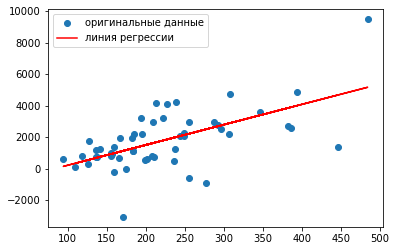

In [70]:
# Строим два графика. С помощью точек находим наши исходные данные и линию регрессии.
plt.plot(X_low_list, y_low, 'o', label='оригинальные данные')
plt.plot(X_low_list, y_pr_low, 'r', label='линия регрессии')
plt.legend()
plt.show()

В целом, думаю можно сказать, что линия регрессии довольно хорошо равноудаленно проходит сквозь облако значений.

Теперь создадим новый датафрейм из тех же числовых данных за 2017 год, что у нас уже есть, но добавим еще один аргумент - среднее значение скидки в ту же неделю.

In [71]:
data_2017_2 = data[data['Year'] == 2017]

In [72]:
# Количество проданных товаров, средняя стоимость товаров, средняя скидка, средняя доходность/убыток
profit_sum = data_2017_2.groupby(data_2017_2['Order Date'].dt.isocalendar().week)['Profit'].sum()
sales_mean = data_2017_2.groupby(data_2017_2['Order Date'].dt.isocalendar().week)['Sales'].mean()
discount_mean = data_2017_2.groupby(data_2017_2['Order Date'].dt.isocalendar().week)['Discount'].mean()

# Соединим полученные значение в 1 датафрейм
profit_per_weeks_many = pd.concat([profit_sum, sales_mean, discount_mean], axis=1)
# quantity_weeks

Проделываем тот же путь, что и для одного аругмента: сначала проверяем рациональность и возможность построения линейной регрессии.

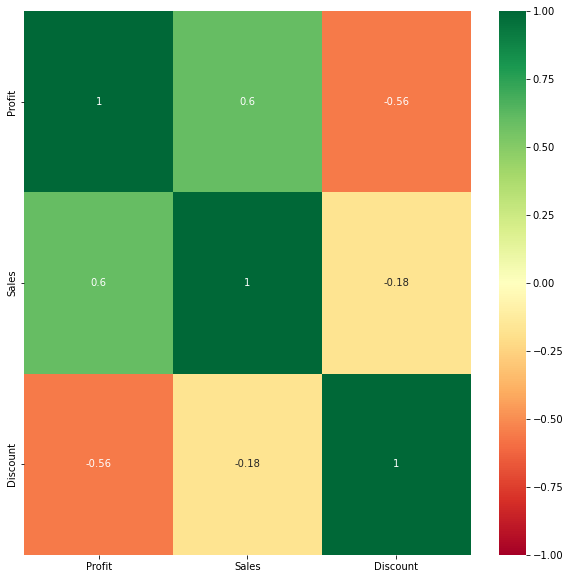

In [73]:
plt.figure(figsize = (10,10))
d1 = sns.heatmap(profit_per_weeks_many.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'RdYlGn')

Видим, что это условие выполняется, как и в исследовании выше у нас неплохо коррелирует доходность со средней стоимостью товара, но и средняя величина скидки тоже почти настолько же (по модулю) коррелирует с доходностью, но обратно пропорциоально.

Теперь проверим, есть ли предпосылки на линейную зависимость у наших данных. Построим парные графики зависимости.

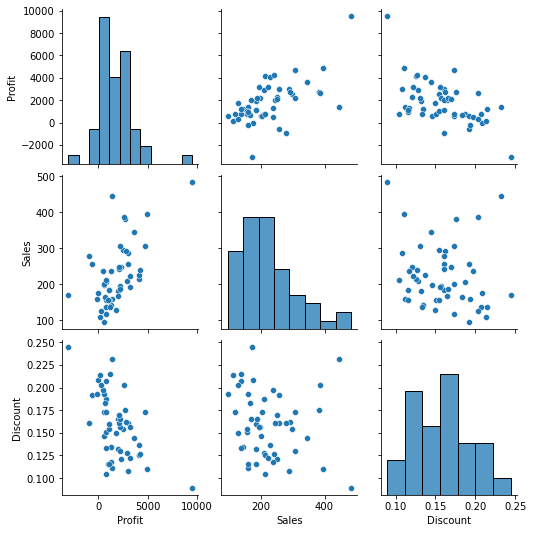

In [74]:
sns.pairplot(profit_per_weeks_many)

В целом да, можно рассмотреть линейные зависимости между данными, думаю можно попробовать построить множественную линейную регрессию. Сначала также соберем все необходимые переменные.

In [75]:
# определяем значения х и у
X = sm.add_constant(profit_per_weeks_many.drop('Profit', axis=1))
y = profit_per_weeks_many['Profit']

# Строим модель
model = sm.OLS(y, X)
res_mult = model.fit()
res_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     32.57
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.01e-09
Time:                        21:09:21   Log-Likelihood:                -442.64
No. Observations:                  52   AIC:                             891.3
Df Residuals:                      49   BIC:                             897.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3175.6582    987.422      3.216      0.002    1191.359    5159.957
Sales         11.1033      2.041      5.441      0.000       7.002      15.204
Discount   -2.428e+04   4942.925     -4.912      0.000   -3.42e+04   -1.43e+04
==============================================================================
Omnibus:                        0.976   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.345
Skew:                          -0.094   Prob(JB):                        0.842
Kurtosis:                       3.352   Cond. No.                     6.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Выводы:
- Коэффициент детерминации имеет низкое значение, охватывает всего 57% наших значений, но с другой стороны это хорошо, потому что добавив еще один аргумент - мы смогли увеличить коэффициент детерминации, по сравнению с первой моделью.
- Значения средней стоимости товара и средней скидки - статистически значимы, это хорошо.
- Судя по полученным коэффициентам: у нас есть прямая зависимость от средней стоимости 11.10, и что, в целом, логично, прослеживается обратная зависимость дохода от величины скидки - (-0.00024).

Проведем проверку адекватности полученной множественной линейной регрессии. Для этого рассчитаем предсказанное значение и применим специальные функции для рассчета MAE, MSE, RMSE.

In [76]:
# Рассчитаем новое значение для y по полученной модели
y_pr = res_mult.predict(X)

In [77]:
# MAE
print('MAE = %s' % skl.mean_absolute_error(y_pr,y))

MAE = 924.3253954185784


In [78]:
# MSE
print('MSE = %s' % skl.mean_squared_error(y_pr,y))

MSE = 1449776.8677024927


Коэффициенты по оценке качества построенной множественной линейной регрессии получились очень большие, это говорит о том, что модель обучена недостаточно хорошо. Возможно имеются в каких-то значениях сильные выбросы, поэтому и значение MSE - довольно большое.

## Логистическая регрессия

Для логистической регрессии нам нужны категориальные данные, притом бинарные. И не просто "да"/"нет", а именно, - 0 или 1. В исходном датасете у нас нет таких значений, поэтому создадим их сами. То есть, возьмем, например, прибыль, если был доход, то (1), если был убыток, то 0; и второй массив - скидка: если была скидка - 1, если не было - то 0. Также возьмем данные за 2017.

In [79]:
data_2017_2['Profit10'] = data_2017_2['Profit'].apply(lambda x: 1 if x > 0 else 0)
data_2017_2['Discount10'] = data_2017_2['Discount'].apply(lambda x: 1 if x > 0 else 0)
# data_2017_2

/var/folders/zv/rrl2yd7s3_q5bvd434fb2hlh0000gn/T/ipykernel_26848/1289576372.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zv/rrl2yd7s3_q5bvd434fb2hlh0000gn/T/ipykernel_26848/1289576372.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Теперь создаем массивы для построения логистической модели.

In [80]:
new_data = data_2017_2[data_2017_2['Year'] == 2017]
X = new_data['Profit10']
y = new_data['Discount10']
X_constant = sm.add_constant(X)
logres = sm.Logit(y, X_constant)
logit = logres.fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.560115
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             Discount10   No. Observations:                 3312
Model:                          Logit   Df Residuals:                     3310
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.1910
Time:                        21:09:21   Log-Likelihood:                -1855.1
converged:                       True   LL-Null:                       -2293.1
Covariance Type:            nonrobust   LLR p-value:                1.666e-192
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2485      0.336     12.655      0.000       3.591       4.906
Profit10      -4.6185      0.

Мы видим, что оба коэффициента у нас стат. значимы. Теперь попробуем интерпретировать, что мы получили, исходя из значений коэффициентов const и Profit10. Исходя из формулы мы должны экспоненцировать полученные коэффиценты модели.

$
ln(\frac{p}{1 - p})
$

In [81]:
print(np.exp(4.2485)) # const
print(np.exp(-4.6185)) #Profit10 

70.0003330573372
0.009867586345218884


О чем эти цифры говорят: 1 и 0 - это доход и убыток, соответственно, если у нас убыток (0), то шанс того, что у нас была скидка - 70:1, и, наоборот, - если у нас доход, то шанс, что скидки не было почти в 1000 раз меньше.

## Выводы:

1. В нашем датасете было почти 10000 данных, собранных супермаркетом в США. Изучив их подробнее, мы определили, что большинство клиентов этого супермаркета пользуются стандартным классом доставки; почти половина покупателей это обычные физ. лица; чаще и больше всего совершают покупку клиенты с доставкой в город Нью-Йорк. Если смотреть в срезе по штатам, то с огромным отрывом лидирует штат Калифорния; 

2. Самая популярная категория- это офисные принадлжености; топ-3 товаров- это самозаклеивающиеся конверты, степлеры и скобы для степлера. По временным факторам: этот супермаркет чаще всего доставляет заказы за 4-5 дней, покупки чаще делаются преимущественно в 20-х числах месяца, в начале недели. Пиковые месяца-это ноябрь и декабрь соответственно.

3. Провели исследование гипотезы "Есть ли связь между сегментом покупателя и количеством покупкок" - непараметрическим способом мы ее не отвергли.

4. Провели исследование гипотезы "Средняя стоимость покупок на востоке США и на западе - одинаковая" - параметрическим способом мы ее тоже не смогли отвергнуть.

5. Построили модель линейной регрессии для одного и нескольких предикторов. Определили, что в обоих случаях есть некая линейная зависимость. Но коэффициенты по оценке качества построенной линейной регрессии для нескольких предикторов получились очень большие, это говорит о том, что модель обучена недостаточно хорошо. Возможно, имеются в каких-то значениях сильные выбросы, поэтому и значение MSE - довольно большое.

6. Также построили логистическую регрессию, установили зависимость между доходом/убытком и наличием/отсутствием скидки. Например, если в супермаркете зарегистрирован убыток, то шанс того, что у них были большие скидки на товары - 70:1. 